#  **King County House Sales Analysis**

---

### Author: [Femi Kamau](https://www.github.com/ctrl-Karugu)

## Overview

In our analysis, we explored the data provided by the stakeholder and build a multiple linear regression model with some the features stipulated in the dataset. From there, we analysed the results and came to a conclusion on the following factors that have a significant impact on the price of a house in King County:

- Have a house by the water
  
- Increase the number of bedrooms

- Improve the overall grade of the home

- Increase the number of floors

- Increase the size of the basement

- Strive to maintain the house to ensure that it is in good condition

## 1. Business Understanding

A real estate angency located in King County is looking to advice home owners about how home renovations might increase the value of their homes. The agency is looking to use the King County house data provided to determine the best renovations to make to increase the value of a home.

## 2. Data Understanding
> This phase is broken down into four tasks together with its projected outcome or output in detail:
> - Collect Initial Data
> - Describe Data
> - Explore Data
> - Verify Data Quality

There was no need to collect any data for this project as it was already provided by the stakeholder. The data consists of house data from King County and is in .csv format.

Load Libraries

In [274]:
# data
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
import warnings

# modeling
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# statistics
import scipy.stats as stats

# styling
plt.style.use('seaborn')
sns.set_style('whitegrid')

warnings.filterwarnings('ignore')

Import Data

In [275]:
# King County House Sales dataset is imported and assigned to the variable 'data'
data = pd.read_csv('../data/raw/kc_house_data.csv')

# The shape of the dataframe and the last 5 rows are outputted
print(data.shape) 
data.tail()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


There are 21 columns and 21597 rows in the dataset:
- **Numerical Columns (15)** 
  
  `date` - Date house was sold

  `price` - Sale price (prediction target)

  `bedrooms` - Number of bedrooms

  `bathrooms` - Number of bathrooms

  `sqft_living` - Square footage of living space in the home

  `sqft_lot` - Square footage of the lot

  `floors` - Number of floors (levels) in house

  `sqft_above` - Square footage of house apart from basement

  `sqft_basement` - Square footage of the basement

  `yr_built` - Year when house was built

  `yr_renovated` - Year when house was renovated

  `lat` - Latitude coordinate

  `long` - Longitude coordinate

  `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
  
  `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

- **Categorical Columns (6)**

  `id` - Unique ID for each home sold

  `waterfront` - Whether the house has a view to a waterfront

  `view` - An index from 0 to 4 of how good the view of the property was

  `condition` - An index from 1 to 5 on the condition of the house

  `grade` - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design

  `zipcode` - What zipcode area the house is in

In [276]:
# Describe the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

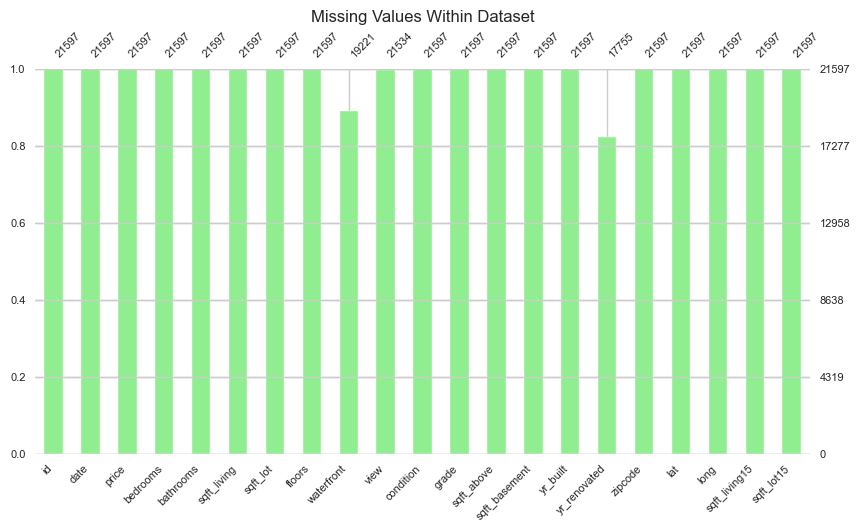

In [277]:
# Visualise the missing values in the dataset
msno.bar(data, color='lightgreen', figsize=(10, 5), fontsize=8)
plt.title('Missing Values Within Dataset');

From the barplot above, we can see that the columns with missing data are `waterfront`, `view`, and `yr_renovated`. The `waterfront` column has 2376 missing values, the `view` column has 63 missing values, and the `yr_renovated` column has 3842 missing values. This accounts for 11%, 0.3%, and 18% of the total number of rows in the dataset respectively.

### 2.1 Univariate Analysis
> In this section, we'll explore each column in the dataset to see the distributions of features and obtain some useful insights. The main two parts in this section are: 
>   - Categorical Columns
>   - Numerical Columns

#### 2.1.1 Categorical Columns

There are 5 Categorical Columns in the dataset that we shall be analysing:

- `id`

- `waterfront`

- `view`

- `condition`

- `grade`

- `zipcode`

Functions to visualise the data in the categorical columns

In [278]:
# Fuction to get the value counts of the data in the columns
def get_value_counts(df, col):
    ''' Returns the value counts of a column in a dataframe '''
    counts = df[col].value_counts(dropna=False)
    return counts

# Function to visualise the the data in the columns
def plot_data(df, col, title):
    ''' Plots the value counts of a column in a dataframe as a bar chart '''
    get_value_counts(df, col).plot(kind='bar', figsize=(10, 5), color='lightgreen', edgecolor='black')
    plt.title(title)
    plt.xticks(rotation=0);

##### 2.1.1.1 ID
> The `id` column is a unique identifier for each house sold.


The univariate analysis of the `id` column will be less about identifying the data distribution, but more about identifying the number of unique values in the column. From the count of the unique values we will be able to know if the column contains any duplicates.

In [279]:
# Check for duplicates in the 'id' column
data.id.duplicated().sum()

177

We see that there are 177 duplicated ids in the dataset. This could mean that there are some houses that have been sold more than once, or it could also mean that there are some records that have been imputted in this dataset more than once. We will have to investigate this further in the data preparation phase.

##### 2.1.1.2 Waterfront
> The `waterfront` column identifies whether the house is on a waterfront or not.

NO     19075
NaN     2376
YES      146
Name: waterfront, dtype: int64


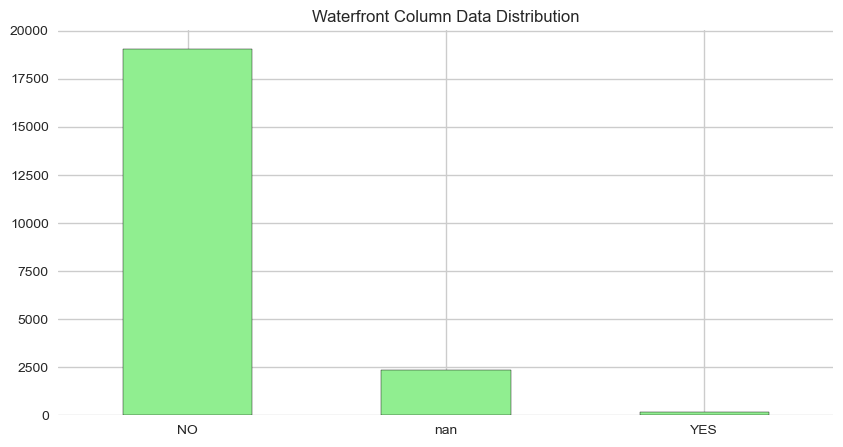

In [280]:
# Identify the unique values (and counts) in the 'waterfront' column
print(get_value_counts(data, 'waterfront'))

# Visualise the data distribution
plot_data(data, 'waterfront', 'Waterfront Column Data Distribution')    

The distribution above shows that most of the houses in the dataset are not on a waterfront. The number of houses on a waterfront is 146, which is 0.7% of the total number of houses in the dataset. The missing values in this column are 2376, which is 11% of the total number of rows in the dataset. As this is a categorical column, we will impute the missing values with the mode of the column.

##### 2.1.1.3 View
> The view column identifies the quality of view from the house.

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
NaN             63
Name: view, dtype: int64


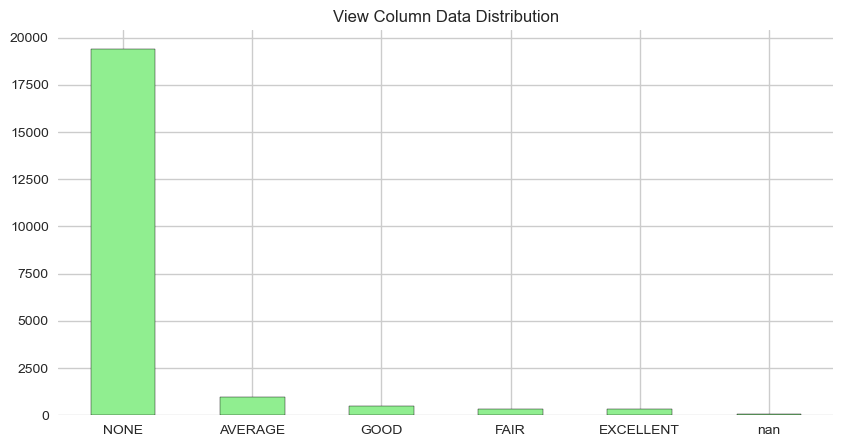

In [281]:
# Identify the unique values (and counts) in the 'view' column
print(get_value_counts(data, 'view'))

# Visualise the data distribution
plot_data(data, 'view', 'View Column Data Distribution')

In the distribution above, we see that majority of the houses in the dataset have a no view. Furthermore, the missing values in this columns are 63, which is 0.29% of the total number of rows in the dataset. As this is a small percentage of the total number of rows in the dataset, we can drop the rows with missing values in this column.

##### 2.1.1.4 Condition
> The condition column identifies the condition of the house.

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64


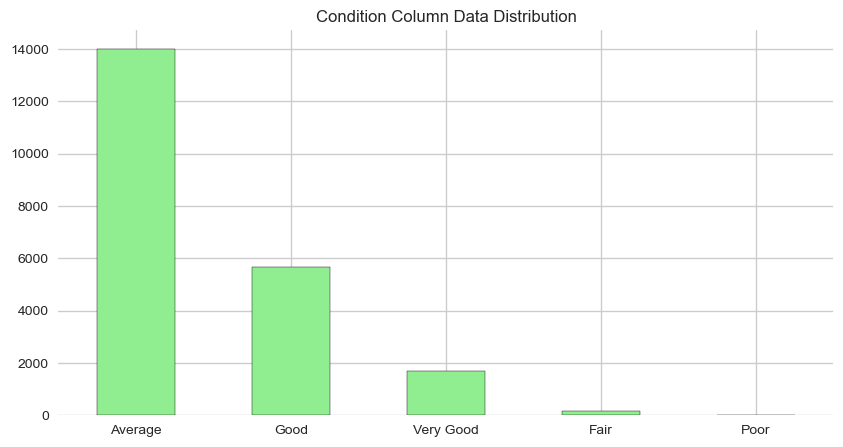

In [282]:
# Identify the unique values (and counts) in the 'condition' column
print(get_value_counts(data, 'condition'))

# Visualise the data distribution
plot_data(data, 'condition', 'Condition Column Data Distribution')

From the distribution above, we can see that most of the houses in the dataset are in average condition. The number of houses in average condition is 12437, this accounts for 57.6% of the total number of houses in the dataset. The number of houses in good condition are 5041, this accounts for 23.3%  of the total number of houses in the dataset. The number of houses in very good condition are 1509, this accounts for 7% of the total number of houses in the dataset. The number of houes in fair condition are 152, this accounts for 0.7% of the total number of houses in the dataset. The number of houses in poor condition are 25, this accounts for 0.1% of the total number of houses in the dataset. Furthermore, we can see that there is no missing data within this column.

##### 2.1.1.5 Grade
> The grade column identifies the quality of construction and design of the house. The grade represents the construction quality of improvements. Grades run from grade 1 to 13.

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


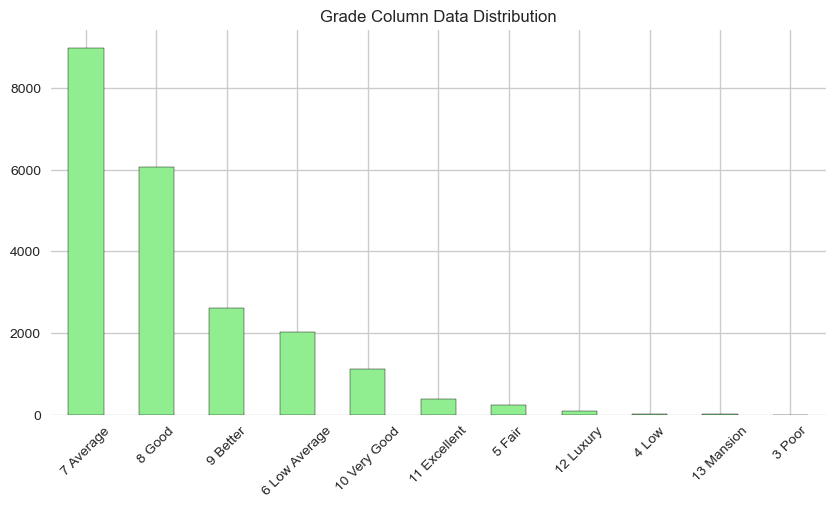

In [283]:
# Identify the unique values (and counts) in the 'grade' column
print(get_value_counts(data, 'grade'))

# Visualise the data distribution
plot_data(data, 'grade', 'Grade Column Data Distribution')
plt.xticks(rotation=45);

From the distribution above, we see that the houses in this dataset range from grades 3-13. The column is however not evenly distributed as we can see majority of the houses with a grade of 7 (representing Average), and 8 (representing Good). Lastly, there are no missing values within this column.

##### 2.1.1.5 Zipcode
>The zipcode column identifies the zipcode area the house is in.

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64


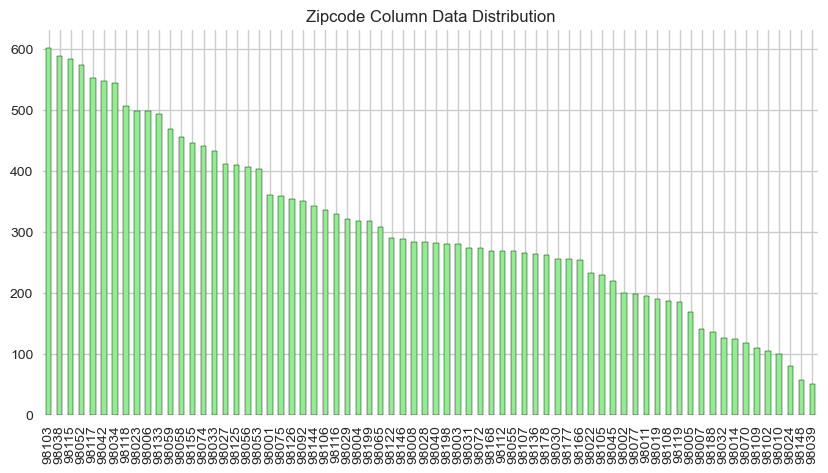

In [284]:
# Identify the unique values (and counts) in the 'zipcode' column
print(get_value_counts(data, 'zipcode'))

# Visualise the data distribution
plot_data(data, 'zipcode', 'Zipcode Column Data Distribution')
plt.xticks(rotation=90);

From the distribution above, we see that the zipcode with the most houses is 98103. The zipcode with the least houses is 98039. Unlike the other categorical columns, we see more evenly distributed data in this column. There is no missing data in this column.

**Summary Of The Categorical Columns**
- The quality of the data in the categorical columns is fairly good. Other than a few missing values in the `waterfront` and `view` columns, and duplicated values in the `id` column, the data is good to work with.

#### 2.1.2 Numerical Columns

There are 15 Numerical Columns in the dataset that we shall be analysing:

- `date`

- `price`
  
- `bedrooms`
  
- `bathrooms`
  
- `sqft_living`
  
- `sqft_lot`

- `floors`
  
- `sqft_above`
  
- `sqft_basement`
  
- `yr_built`
  
- `yr_renovated`
  
- `lat`
  
- `long`
  
- `sqft_living15`
  
- `sqft_lot15`

 Functions to visualise the data in the numerical columns

In [285]:
# Fuction that describes the statistics of the data
def describe_data(df, col):
    ''' Returns the statistics of a column in a dataframe '''
    print(df[col].describe())

# Function to plot the histogram, kde and boxplot of the data
def plot_distribution(df, col, title, bins_=10):
    ''' Plots the distribution of a column in a dataframe as a histogram, kde and boxplot '''
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))
    
    # assign a graph to each ax
    sns.boxplot(df[col], ax=ax_box, color='lightgreen')
    sns.histplot(data=df, x=col, ax=ax_hist, kde=True, color='lightgreen', bins=bins_, edgecolor='black')
    plt.suptitle(title)
    plt.tight_layout();

##### 2.1.2.1 Date
> The `date` column identifies the date the house was sold.

Date can either be a categorical or numerical column. In this case, we will treat it as a numerical column.

In [286]:
# Print all the unique values in the 'date' column
print(get_value_counts(data, 'date').index.tolist())

# Get the unique values (and counts) in the 'date' column
print(get_value_counts(data, 'date'))

['6/23/2014', '6/25/2014', '6/26/2014', '7/8/2014', '4/27/2015', '3/25/2015', '7/9/2014', '4/14/2015', '4/28/2015', '4/22/2015', '6/24/2014', '4/21/2015', '8/26/2014', '10/28/2014', '7/14/2014', '5/20/2014', '7/1/2014', '8/20/2014', '6/17/2014', '4/29/2015', '7/29/2014', '4/8/2015', '7/16/2014', '5/28/2014', '4/23/2015', '8/5/2014', '3/27/2015', '8/25/2014', '6/20/2014', '7/23/2014', '8/11/2014', '7/22/2014', '3/26/2015', '6/3/2014', '5/27/2014', '8/22/2014', '9/23/2014', '4/2/2015', '4/24/2015', '7/25/2014', '4/7/2015', '5/4/2015', '7/15/2014', '8/27/2014', '6/19/2014', '3/24/2015', '6/4/2014', '11/13/2014', '8/12/2014', '3/4/2015', '7/18/2014', '9/24/2014', '6/18/2014', '2/24/2015', '6/10/2014', '7/21/2014', '6/16/2014', '12/2/2014', '8/13/2014', '10/27/2014', '12/1/2014', '2/25/2015', '3/18/2015', '3/17/2015', '6/9/2014', '7/28/2014', '5/21/2014', '5/5/2015', '7/24/2014', '9/9/2014', '5/7/2014', '8/19/2014', '9/16/2014', '6/5/2014', '6/27/2014', '3/23/2015', '8/14/2014', '10/29/2014

From the output above, we can see that the data has been stored in string format. We will have to convert the data to datetime format in the data preparation phase. Futhermore, it seems that most of the houses were sold in either 2014 or 2015.

##### 2.1.2.2 Price
> The price column identifies the price of the house.

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


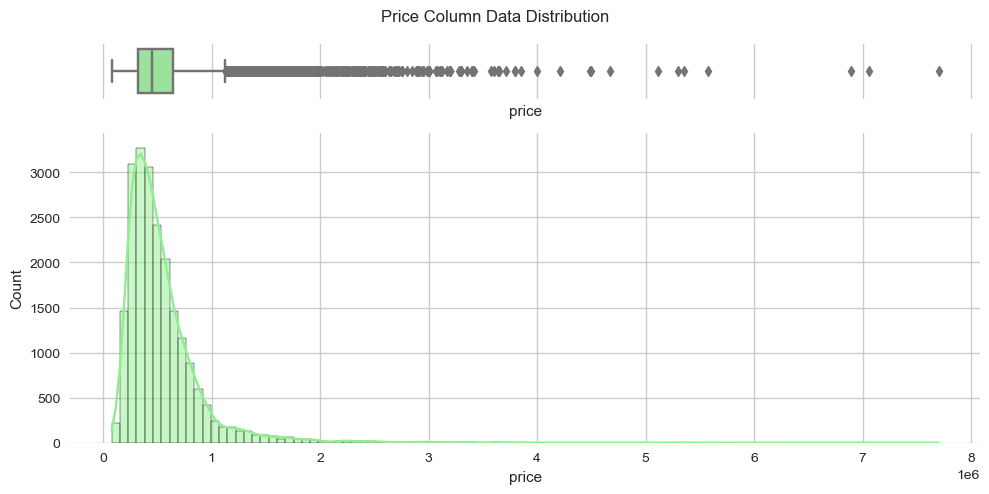

In [287]:
# Describe the 'price' column
describe_data(data, 'price')

# Visualise the data distribution
plot_distribution(data, 'price', 'Price Column Data Distribution', 100)

From the distribution above, we see that the price column is skewed to the right. This means that the mean price of the homes in the dataset are . The minimum price of a house in the dataset is 78,000, and the maximum price of a house in the dataset is 7,700,000. The mean price of a house in the dataset is 540,297, and the median price of a house in the dataset is 450,000. The standard deviation of the price column is 367,368.

Looking at the kurtosis of the distribution shows that

##### 2.1.2.3 Bedrooms
> The bedrooms column identifies the number of bedrooms in the house. 

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


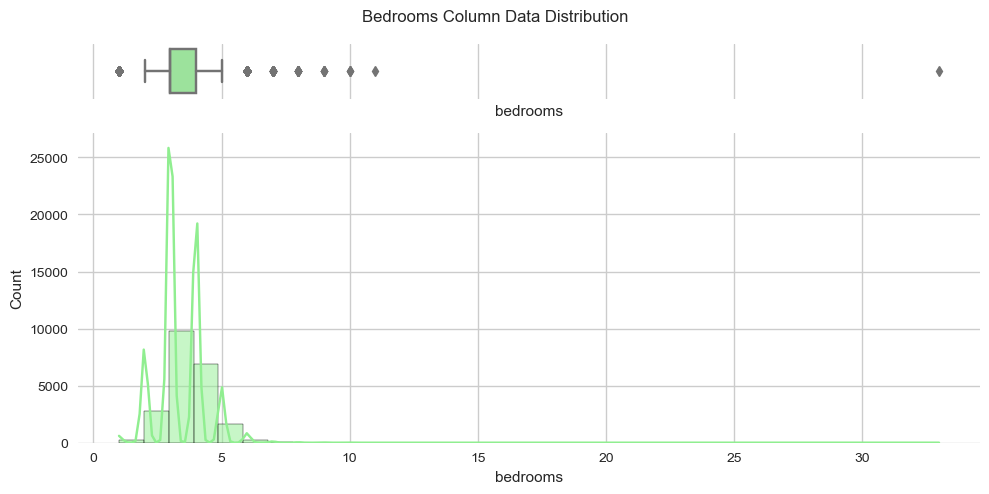

In [288]:
# Describe the 'bedroom' column
describe_data(data, 'bedrooms')

# Visualise the data distribution
plot_distribution(data, 'bedrooms', 'Bedrooms Column Data Distribution',33)

The bedroom column distribution is not skewed as the and is normally distributed. The minimum number of bedrooms in a house in the dataset is 1, and the maximum number of bedrooms in a house in the dataset is 33. The mean number of bedrooms in a house in the dataset is 3.37, and the median number of bedrooms in a house in the dataset is 3. The standard deviation of the bedrooms column is 0.93.

##### 2.1.2.4 Bathrooms
> The bathrooms column identifies the number of bathrooms in the house.

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64


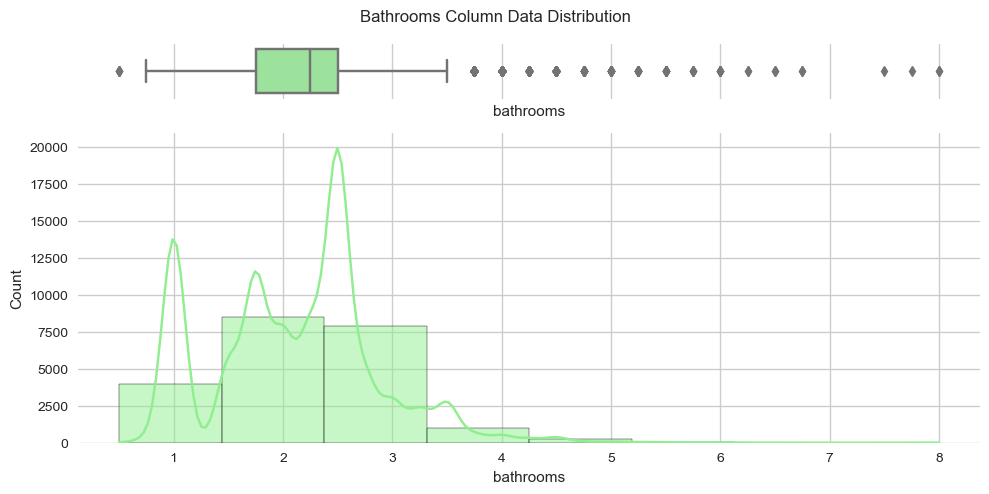

In [289]:
# Describe the 'bathrooms' column
describe_data(data, 'bathrooms')

# Visualise the data distribution
plot_distribution(data, 'bathrooms', 'Bathrooms Column Data Distribution', 8)

From the distribution above we can see that the bathroom column is not skewed. This is because the mean and median are almost the same. The minimum number of bathrooms in a house in the dataset is 0.5, and the maximum number of bathrooms in a house in the dataset is 8. The mean number of bathrooms in a house in the dataset is 2.12, and the median number of bathrooms in a house in the dataset is 2.25. The standard deviation of the bathrooms column is 0.77.

##### 2.1.2.5 Sqft Living
> The sqft living column identifies the square footage of the house.

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


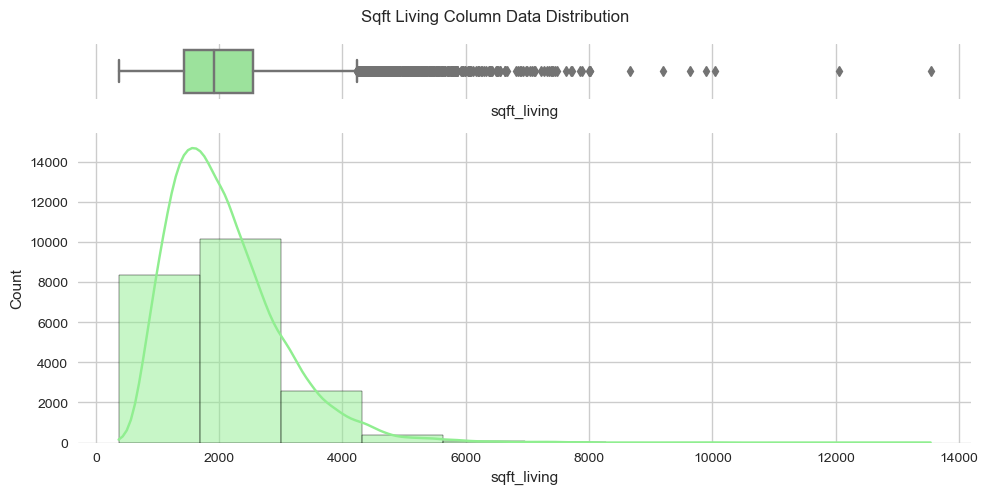

In [290]:
# Describe the 'sqft_living' column
describe_data(data, 'sqft_living')

# Visualise the data distribution
plot_distribution(data, 'sqft_living', 'Sqft Living Column Data Distribution')

From the distribution above, we can see that the sqft living column is skewed to the right. This means that the mean square footage of the homes is greater than the median. The minimum square footage of a house in the dataset is 370, and the maximum square footage of a house in the dataset is 13,540. The mean square footage of a house in the dataset is 2080, and the median square footage of a house in the dataset is 1910. The standard deviation of the sqft living column is 918.

##### 2.1.2.6 Sqft Lot
> The `sqft lot` column identifies the square footage of the lot.

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64


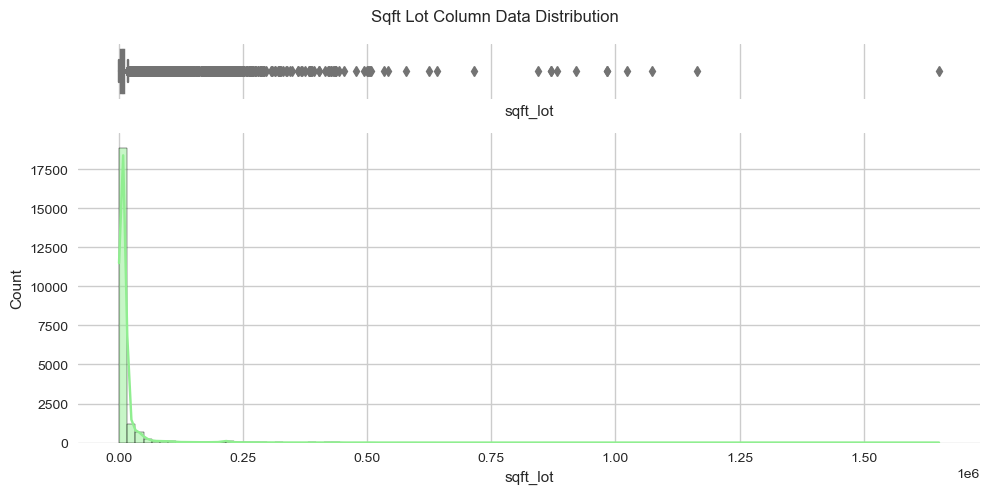

In [291]:
# Describe the 'sqft_lot' column
describe_data(data, 'sqft_lot')

# Visualise the data distribution
plot_distribution(data, 'sqft_lot', 'Sqft Lot Column Data Distribution', 100)

From the distribution above, we can see that the data is skewed to the right. This is because the mean is greater than the median. The minimum lot square footage is 520, the maximium lot square footage is 1,651,359. The mean lot square footage is 15,099, and the median lot square footage is 7618. The standard deviation of the sqft lot column is 41,419.

##### 2.1.2.7 Floors
> `floors` column identifies the number of floors in the house.

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64


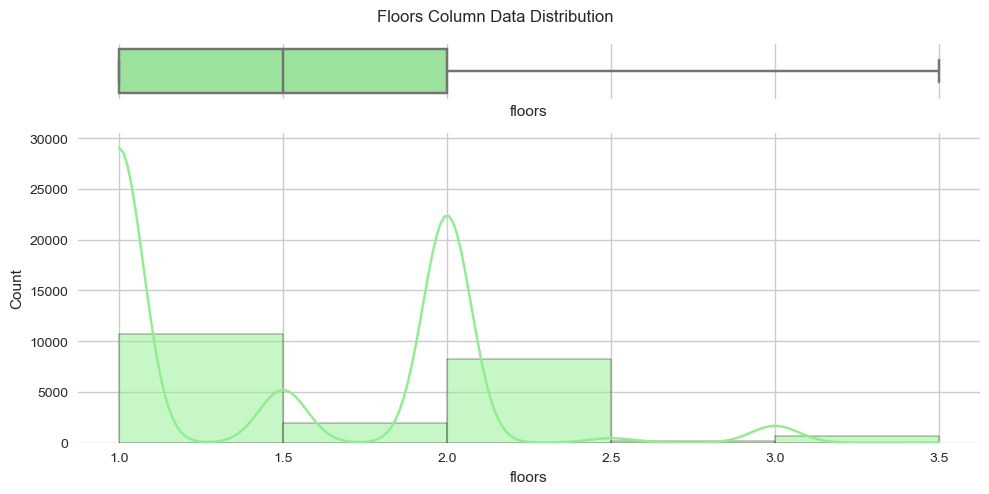

In [292]:
# Describe the 'floors' column
describe_data(data, 'floors')

# Visualise the data distribution
plot_distribution(data, 'floors', 'Floors Column Data Distribution', 5)

From the distributions above, there is no particular trend in the floors column data. Majority of the homes in the data set have 1 floors. The minimum number of floors in a house is 1, and the maximum number of floors in a house is 3.5. The median number of floors in this dataset is 1.5, and the mean number of floors in this dataset is approximately 1.5. The standard deviation of the floors column is 0.54.

##### 2.1.2.8 Sqft Above
> The `sqft above` column identifies the square footage of the house above the ground.

count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64


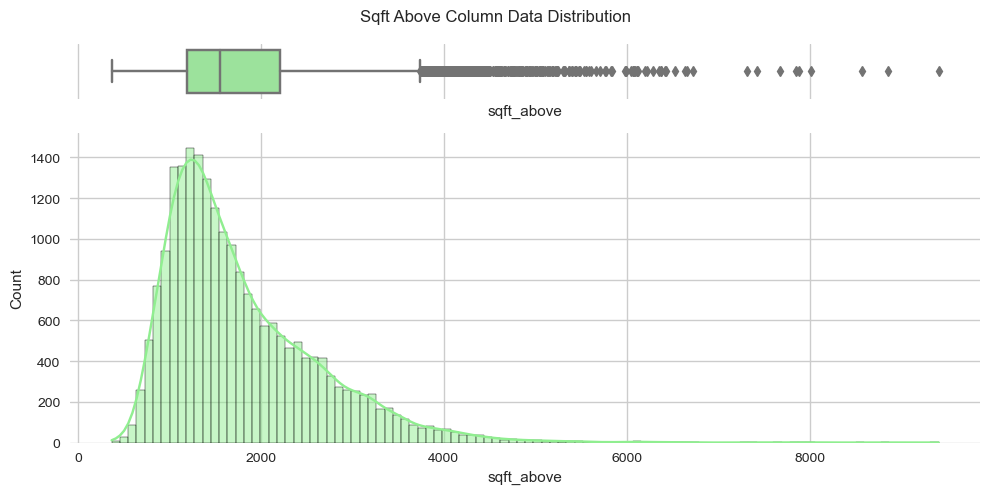

In [293]:
# Describe the 'sqft_above' column
describe_data(data, 'sqft_above')

# Visualise the data distribution
plot_distribution(data, 'sqft_above', 'Sqft Above Column Data Distribution',100)

From the distributions above, we see that the square footage above ground of the houses in this dataset is skewed to the right. This is because the mean is greater than the median. The minimum square footage above ground is 370, and the maximum square footage of a house above ground is 9,410. The mean square footage above ground is 1788, and the median square footage above ground is 1,560. The standard deviation of the sqft above column is 828.

##### 2.1.2.9 Sqft Basement
> The `sqft basement` column identifies the square footage of the basement of the house.

As this column is of the type `object`, we cannot do a distribution like the other numerical columns. Therefore, we shall be viewing the contents of the column using the same technique as the categorical columns.

In [294]:
# Print all the unique values in the 'sqft_basement' column
print(get_value_counts(data, 'sqft_basement').index.tolist())

# Get the unique values (and counts) in the 'sqft_basement' column
print(get_value_counts(data, 'sqft_basement'))

['0.0', '?', '600.0', '500.0', '700.0', '800.0', '400.0', '1000.0', '900.0', '300.0', '200.0', '750.0', '450.0', '530.0', '480.0', '720.0', '620.0', '580.0', '840.0', '420.0', '860.0', '1100.0', '670.0', '780.0', '550.0', '650.0', '240.0', '380.0', '680.0', '850.0', '360.0', '770.0', '940.0', '910.0', '440.0', '880.0', '290.0', '1200.0', '350.0', '520.0', '920.0', '630.0', '730.0', '960.0', '740.0', '430.0', '1010.0', '760.0', '640.0', '280.0', '340.0', '950.0', '820.0', '570.0', '560.0', '460.0', '790.0', '1060.0', '310.0', '980.0', '830.0', '540.0', '810.0', '1040.0', '250.0', '140.0', '120.0', '890.0', '990.0', '1020.0', '470.0', '1070.0', '1250.0', '660.0', '510.0', '870.0', '330.0', '390.0', '690.0', '610.0', '1030.0', '270.0', '150.0', '970.0', '1120.0', '220.0', '100.0', '260.0', '590.0', '930.0', '370.0', '1050.0', '1300.0', '320.0', '710.0', '1400.0', '180.0', '1110.0', '190.0', '1080.0', '1090.0', '1220.0', '1230.0', '1130.0', '1270.0', '1170.0', '1500.0', '160.0', '1140.0', 

From the output above, we can see that this is numeric data that has been converted to a string. This has probably been done because of the presence of the '?' character. In order to make this data usable, we shall be converting the the data to a a float. Furthermore, we will need to deal with the missing values ('?') in this column. The missing values account for 454 records in this dataset. This comes up to 2.1% of the total records in the dataset. As this is a fairly small percentage of the total records, we shall be dropping the records missing values.

##### 2.1.2.10 Yr Built
> The `yr built` column identifies the year the house was built.

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64


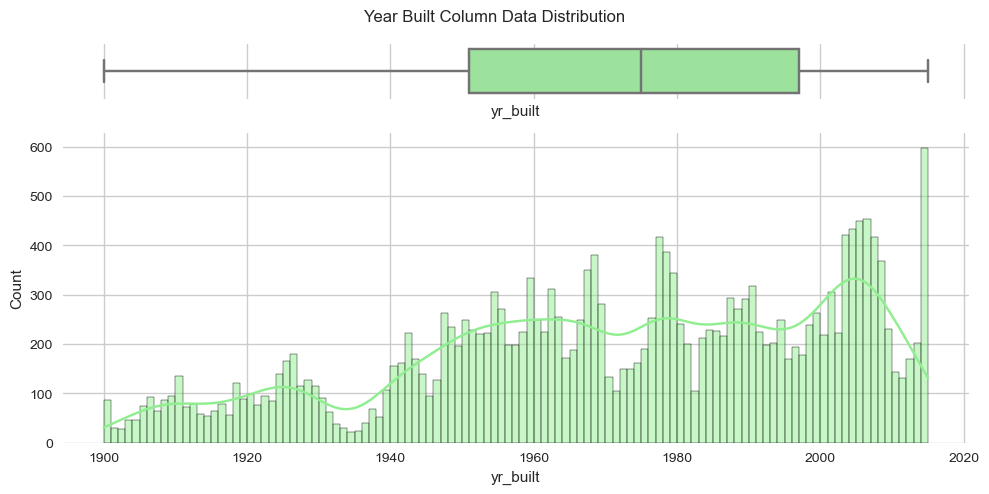

In [295]:
# Describe the 'yr_built' column
describe_data(data, 'yr_built')

# Visualise the data distribution
plot_distribution(data, 'yr_built', 'Year Built Column Data Distribution', 115)

From the distributions above we can see that the data is slightly skewed to the left. This is because the mean is slightly lower than the median. The oldest house in the dataset was built in 1900, and the newest house in the dataset was built in 2015. The mean year the houses in the dataset were built is 1971, and the median year the houses in the dataset were built is 1975. The standard deviation of the yr built column is 29.

##### 2.1.2.11 Yr Renovated
> The `yr renovated` column identifies the year the house was renovated.

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64


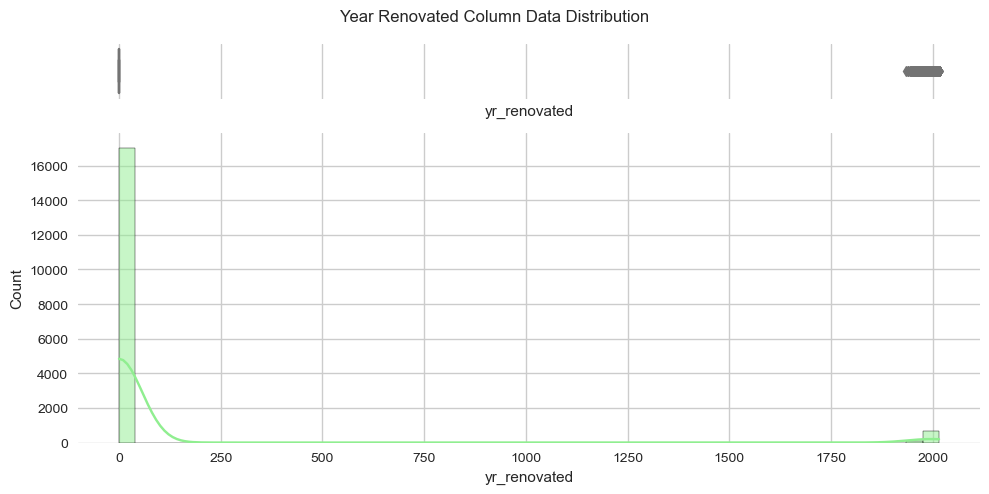

In [296]:
# Describe the 'yr_renovated' column
describe_data(data, 'yr_renovated')

# Visualise the data distribution
plot_distribution(data, 'yr_renovated', 'Year Renovated Column Data Distribution', 50)

From the distribution and value counts above, we can see that the data has a number of zeros. This could either be suggesting that the house has not been renovated, or that the data is missing. Furthermore, there is also some missing data in this column. We shall be analysing the data more indepth in the next phase to see how to deal with the zeros and the missing values in the column.

##### 2.1.2.12 Lat & Long
> The `lat` column identifies the latitude of the house. The `long` column identifies the longitude of the house.

In [297]:
latlon = list(zip(data.lat, data.long))

base_map = folium.Map([data.lat.mean(), data.long.mean()], zoom_start=13)
base_map

for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1]], fill_color='#43d9de', radius=8 ).add_to(base_map)
    
# export the map as HTML file
base_map.save('../images/map.html')

From the exported map above, we can see that the houses in the dataset are located in the of Washington. More importantly, we see that the houses are roughly within the same area therefore we do not need to worry about erroneous data in the lat and long columns.

##### 2.1.2.13 Sqft Living15
> The `sqft living15` square footage of interior housing living space for the nearest 15 neighbors

count    21597.000000
mean      1986.620318
std        685.230472
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64


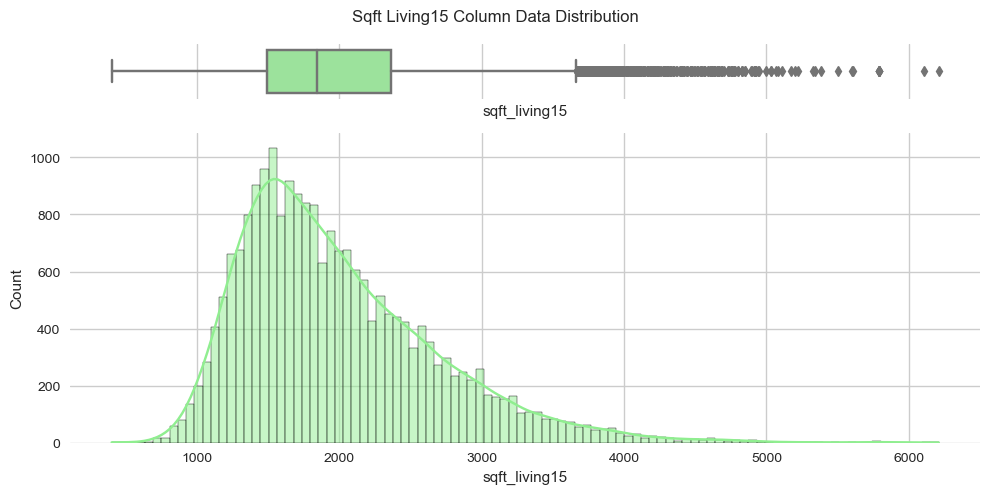

In [298]:
# Describe the 'sqft_living15' column
describe_data(data, 'sqft_living15')

# Visualise the data distribution
plot_distribution(data, 'sqft_living15', 'Sqft Living15 Column Data Distribution', 100) 

From the distributions above, we can see that the data is skewed to the right. This is as a result of the mean being greater than the median. The minimum square footage of the nearest 15 neighbors is 399, and the maximum square footage of the nearest 15 neighbors is 6,210. The mean square footage of the nearest 15 neighbors is 1987, and the median square footage of the nearest 15 neighbors is 1840. The standard deviation of the sqft living15 column is 685.

##### 2.1.2.14 Sqft Lot15
> The `sqft lot15` column represents the square footage of the land lots for the nearest 15 neighbors.

count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64


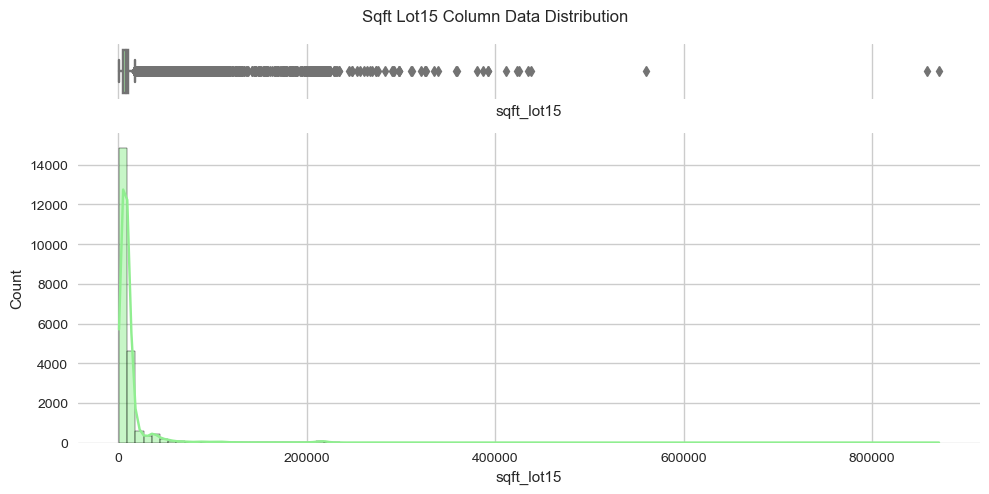

In [299]:
# Describe the 'sqft_lot15' column
describe_data(data, 'sqft_lot15')

# Visualise the data distribution
plot_distribution(data, 'sqft_lot15', 'Sqft Lot15 Column Data Distribution', 100)

In the distributions above we see a much more skewed to the right column. The minimum square footage of the nearest 15 neighbors is 651, and the maximum square footage of the nearest 15 neighbors is 871,200. The mean square footage of the nearest 15 neighbors is 12758, and the median square footage of the nearest 15 neighbors is 7620. The standard deviation of the sqft lot15 column is 27274.

**Summary Of Numerical Columns**
- The data in the numerical columns is also of fairly decent quality. Other than a few missing values in the sqft basement column and datatype corrections that need to be made to the date and sqft basement columns, the data is fairly clean. There are quite a number of outliers in the data, however, I do not think that will affect the analysis much.

## 3. Data Processing
> This phase, which is often referred to as “data munging”, prepares the final data set(s) for modeling. It has five tasks:
> - Select Data
> - Clean Data
> - Construct Data
> - Integrate Data
> - Format Data

### 3.1 Clean Data
> In this section we will be looking at the missing values in the dataset as well as the duplicate records in the dataset.

The columns that were identified to be having missing data and duplicates were:
- `id`
- `waterfront`
- `yr renovated`
- `view`


#### 3.1.1 Duplicate Records

The `id` column was identified to have duplicate records. However, we did not know if the duplicate records were actually duplicates or if they were different records with the same id. In order to find out, we shall be checking the number of unique records in the id column. 

In [300]:
# Create a new dataframe that contains the ids that have been duplicated in the dataset.
duplicates = data[data.duplicated(['id'], keep=False)]

# Preview the duplicates dataframe
duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,NO,NONE,...,9 Better,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


Looking at the duplicated id records, we can see that the records are not erroneous. The ids are duplicated because the same house was sold multiple times. Therefore, we shall be keeping the records. In order to further ensure there aren't any duplicate records, we shall be checking the `date` column along with the `id` to see if the there is a house that has been sold multiple times on the same day. That would be an erroneous record. 

In [301]:
# Check for duplicate records that have both the same id and date
duplicates[duplicates.duplicated(['id', 'date'], keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


We see that we have no records indicating that the same house has been sold multiple times on the same day. Therefore, we shall be keeping the records with duplicated ids.

#### 3.1.2 Missing Values

The columns that were identified to be having missing data were `waterfront`, `yr renovated` and `view`. We shall be dealing with the missing values in these columns. Furthermore, using the insights that were identified from the previous phase, we shall be using the type of data along with the data distribution to determine the best way to deal with the missing values.

##### 3.1.2.1 Waterfront

The `waterfront` column is a categorical column. The column has 2 unique values, 'YES' and 'NO'. With 2376 missing values, this accounted for 11% of the total records in the dataset. As this is a fairly large percentage of the total records, we shall be replacing the missing values with the mode of the column. The mode of the column is 'NO'. Therefore, we shall be replacing the missing values with 'NO'.


In [302]:
# Fill the missing values with the mode of the column
data['waterfront'] = data['waterfront'].fillna(data['waterfront'].mode()[0])

##### 3.1.2.2 Year Renovated

The `yr renovated` column is a numerical column. With 3842 missing values, this accounted for 17.8% of the total records in the dataset. Futhermore, majority of the data in the records were zero. This could either be suggesting that the homes have never been renovated or that the data is erroneous. As there is no ideal way of daling with these values, it would be best to drop the entire column.

In [303]:
# Drop the 'yr_renovated' column
data.drop('yr_renovated', axis=1, inplace=True)

# Preview the first five rows of the dataframe
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


##### 3.1.2.3 View

The `view` column is a categorical column. With 63 missing values, this accounted for 0.3% of the total records in the dataset. As this is a small percentage of the total records, we shall be dropping the records with missing values.

In [304]:
# Drop the missing records in the 'view' column
data = data[data.view.notnull()]

get_value_counts(data, 'view')


NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

### 3.2 Construct Data
> In this section, we shall be deriving new attributes that will be helpful in our analysis.

We shall be creating new columns that will be useful in the analysis. The columns that we shall be looking at are the `date` and `price` columns which represents the date that the homes were sold and their price respecively. We will extract the year from the date column and creating a new column called `yr_sold`. The `yr_sold` column will be used to both check if we need to adjust the price of the homes for inflation, if so, the column will once again be used to calculate the adjusted price.

#### 3.2.1 Year Sold
> The `yr sold` column represents the year that the homes were sold.

2014    14588
2015     6946
Name: yr_sold, dtype: int64


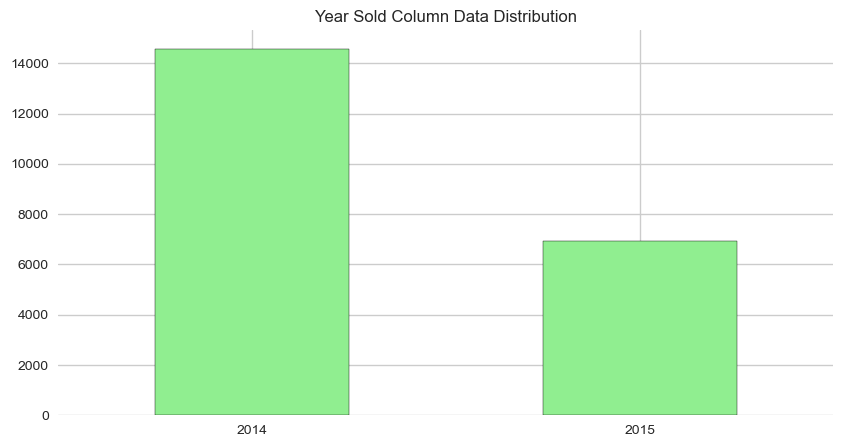

In [305]:
# Create a new column, 'yr_sold', from the 'date' column
data['yr_sold'] = data['date'].apply(lambda x: int(x.split('/')[-1]))

# View the values (and counts) in the 'yr_sold' column
print(get_value_counts(data, 'yr_sold'))

# Visualise the data distribution
plot_data(data, 'yr_sold', 'Year Sold Column Data Distribution')

We see that the `yr sold` column has been created and populated with the year that the homes were sold. The majority of the homes in the dataset were sold in 2014. Ultimately, the data is fairly clean and good to work with.

#### 3.2.2 Current Price
> The `current price` column represents the price of the homes adjusted for inflation.

The `current price` column could be created since there are different years involved in the sale of the homes, as a result, the prices of the homes may be different due to the different market conditions. Therefore, by creating a new column with the current price of the homes, we can fairly compare the prices of the homes in different years. However, in order to create this column, we first have to establish that the prices of the homes are indeed different due to the different market conditions. We shall be doing this by looking at the distributions of the prices of the homes sold in the different years against each other.

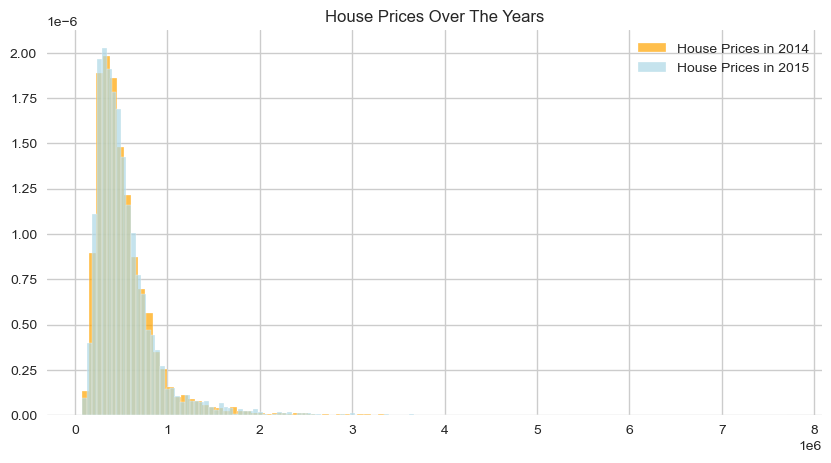

In [306]:
# Create different dataframes for each year (2014 and 2015)
df_2014 = data[data['yr_sold'] == 2014]
df_2015 = data[data['yr_sold'] == 2015]


# Plot the distribution of the 'price' column for each year
fig, ax = plt.subplots(figsize=(10, 5))

plt.hist(df_2014['price'], bins=100, color='orange', alpha=0.7, label='House Prices in 2014', density=True)
plt.hist(df_2015['price'], bins=100, color='lightblue', alpha=0.7, label='House Prices in 2015', density=True)
plt.title('House Prices Over The Years')
plt.legend();

From the distribution above, we can see that there is not much difference in the prices of the homes sold in the different years. Therefore, there is no need to create a new column with the current price of the homes. We can also drop the `yr sold` column as it is no longer needed.

In [307]:
# Drop the 'yr_sold' column
data.drop('yr_sold', axis=1, inplace=True)

### 3.3 Format Data
> In this section, we shall be re-formatting data as necessary.

The specific columns that we shall be looking at in this section are:
- `date` 
- `sqft_basement`

#### 3.3.1 Date

We shall be converting the date column to a datetime object.

In [308]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

# Preview the first five rows of the dataframe
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


#### 3.3.2 Basement Square Footage

We shall be converting the `sqft_basement` column to a numerical column. However, we first need to deal with the erroneous '?' value that we identified in the previous phase. In the previous phase we saw that it accounted for 2.1% of the total records in the dataset. As this is a fairly small percentage of the total records, we shall be dropping the records with the erroneous '?' value. This will ensure that we are not introducing any bias into the dataset. Once we have dropped the records with the erroneous '?' value, we shall be converting the remaining `sqft_basement` column values to a float.

In [309]:
# Drop the records with a '?' in the 'sqft_basement' column
data = data[data['sqft_basement'] != '?']

# Convert the 'sqft_basement' column to float
data['sqft_basement'] = data['sqft_basement'].astype(float)

# Preview the first five rows of the dataframe
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


count    21082.000000
mean       291.359975
std        442.007858
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64


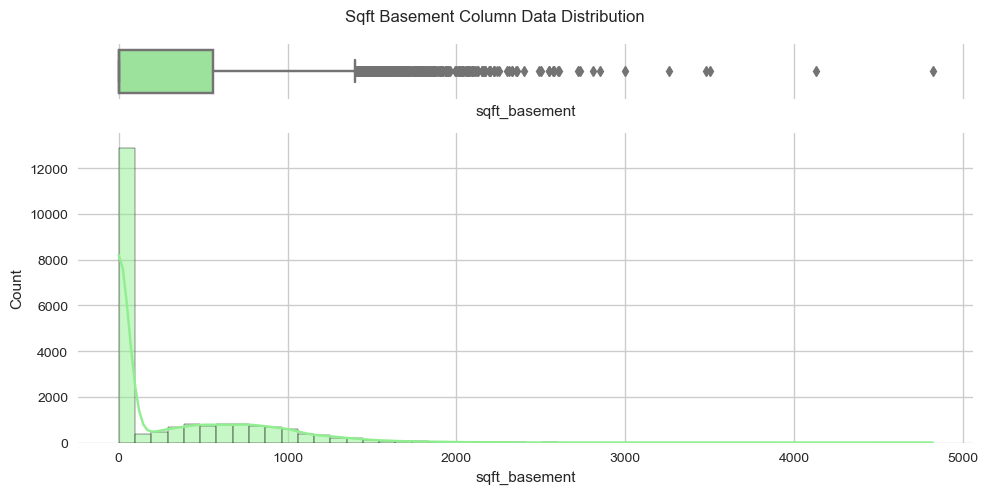

In [310]:
# We can also visualize the data distribution of the 'sqft_basement' column
describe_data(data, 'sqft_basement')

# Plot the visualisation
plot_distribution(data, 'sqft_basement', 'Sqft Basement Column Data Distribution', 50)

From our distributions above, we can see that the 'sqft_basement' column is highly positively skewed. This can be seen as the mean is higher than the median. This is as a result of the outliers in the data. Furthermore, we can also see that the maxiumum basement size is 4820 square feet. This is quite a large basement size. However, we shall be keeping the data as it is as it is not erroneous.

Now that we have completely cleaned our data, we can export the cleaned data to a csv file.

In [311]:
# Export the dataframe to a csv file
data.to_csv('../data/processed/cleaned_kc_house_data.csv', index=False)

## 4. Modeling
>  In this phase, we’ll likely build and assess various models based on several different modeling techniques. This phase has four tasks:
> - Select Modeling Techniques
> - Generate Test Design
> - Build Models
> - Assess Models

### 4.1 Select Modeling Techniques
> In this section, we shall be determining which algorithms to try

I believe that the best algorithm to try for this experiment is regression. Regression is a supervised learning algorithm that is used to predict the value of a dependent variable based on the value of the independent variables. In this case we are tying to estimate the effect that the different features of the homes has on our dependent variable, the price of the homes. As a result, we will be able to provide our stakeholder with a model that will be able to predict the most pivotal features of the homes that will have the most impact on the price of the homes.

Furthermore, as we are working with multiple features, we will be using multiple linear regression. Multiple linear regression is a regression algorithm that is used to predict the value of a dependent variable based on the value of multiple independent variables (unlike linear regression which only uses one independent variable). 

### 4.2 Build Models
> In this section, we shall be building the models.

We will first start by building a baseline model. The baseline model will be used to compare the performance of the other models that we will be building. After that, we will build our multiple linear regression model.

#### 4.2.1 Build Baseline Simple Linear Regression Model
> A baseline model is essentially a simple model that acts as a reference in a machine learning project. Its main function is to contextualize the results of trained models.

The target variable is price. Therefore, we look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with price.

In [312]:
# Create a correlation matrix for the dataset
corr = data.corr()['price'].sort_values(ascending=False)
corr

price            1.000000
sqft_living      0.702004
sqft_above       0.605481
sqft_living15    0.586495
bathrooms        0.525029
sqft_basement    0.323018
bedrooms         0.308454
lat              0.307667
floors           0.256603
sqft_lot         0.088400
sqft_lot15       0.083530
yr_built         0.054849
long             0.022512
id              -0.016413
zipcode         -0.053429
Name: price, dtype: float64

We see that the `sqft_living` column has the highest correlation with the `price` column. This is expected since the size of the house is a major factor in determining the price of the house. We shall also create a scatter plot to view the relationship between the `sqft_living` and `price`.

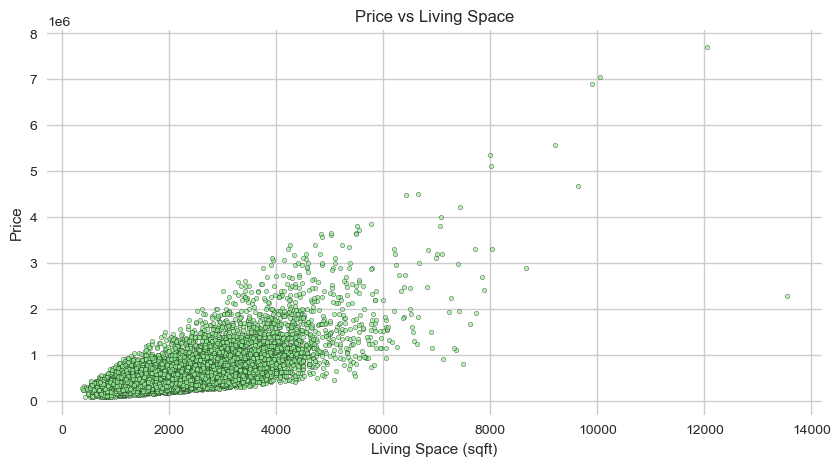

In [313]:
# Plot a scatter plot of the 'price' column against the 'sqft_living' column
plt.figure(figsize=(10, 5))
plt.scatter(data['sqft_living'], data['price'], color='lightgreen', alpha=0.7, s=10, edgecolors='black')
plt.title('Price vs Living Space')
plt.xlabel('Living Space (sqft)')
plt.ylabel('Price');

 We can now declare y and X_baseline variables, where y is a Series containing price data and X_baseline is a DataFrame containing the column with the strongest correlation (`sqft_living`).

In [314]:
# Declare y and X_baseline variables
y = data['price']
X_baseline = data[['sqft_living']]

Next, we'll use our variables to build and fit a simple linear regression model

In [315]:
# Create a baseline model
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

# Print the summary results of the baseline model
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.048e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:55:31   Log-Likelihood:            -2.9287e+05
No. Observations:               21082   AIC:                         5.857e+05
Df Residuals:                   21080   BIC:                         5.858e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.327e+04   4456.393     -9.709      

We can plot the regression line on top of the scatter plot earlier to see how well the model fits the data.

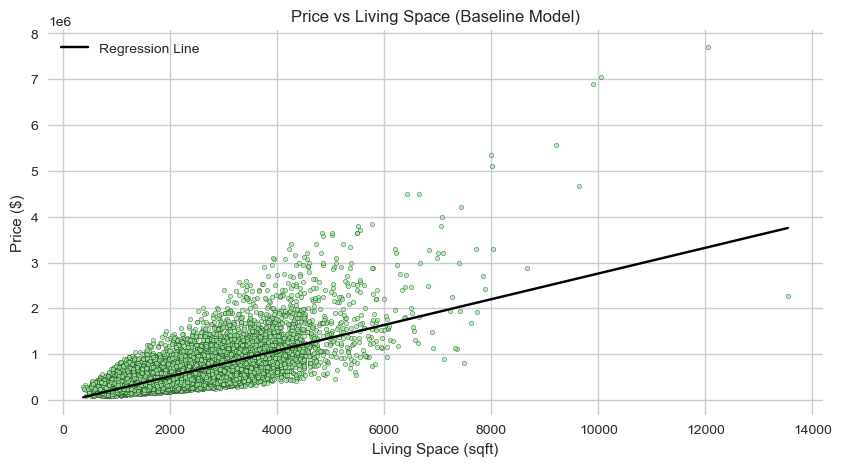

In [316]:
# Plot a scatter plot of the 'price' column against the 'sqft_living' column
plt.figure(figsize=(10, 5))

# Plot the regression line of the baseline model
x = np.linspace(data.sqft_living.min(), data.sqft_living.max(), 100)
Y = baseline_results.params[0] + baseline_results.params[1] * x

plt.plot(x, Y, color='black', label='Regression Line')

plt.scatter(data['sqft_living'], data['price'], color='lightgreen', alpha=0.7, s=10, edgecolors='black')
plt.title('Price vs Living Space (Baseline Model)')
plt.xlabel('Living Space (sqft)')
plt.ylabel('Price (\$)')
plt.legend();

In [317]:
# Calculate the mean absolute error of the baseline model
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

173713.2378046139

Our most strongly correlated variable with `price` is `sqft_living`

The model is statistically significant as it explains only 50% of the variance in the data. However, it is a good starting point for our analysis. In a typical prediction, the model is off by about \$173992.
  
- The intercept is about -\$45130. This means that that a zero square foot house would be worth about - \$45130.
  
- The coefficient of `sqft_living` is about \$281. This means that for every square foot increase in the house, the price of the house increases by about \$281.

#### 4.2.2 Build Iterated Multiple Linear Regression Model
> We will now iterate the baseline model by building a multiple linear regression model that will have more than one independent variable.

We will start by creating a new dataframe that will contain all of the features that we want to have in our model. After that, we will encode the categorical columns. In order to know which variables to keep in our model, we will first look at a correlation matrix. This is done in order to reduce multicollinearity. Multicollinearity is a situation in which two or more independent variables are highly correlated. This can cause problems in the model as it can lead to unstable estimates of the regression coefficients. Therefore, we will be removing the variables that are highly correlated with each other.

In [318]:
# Declare X_iter variables
X_iter = data[['bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built','sqft_living15', 'sqft_lot15']]

# Preview the X_iter dataframe
X_iter

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,1340,5650
1,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1690,7639
2,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,2720,8062
3,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,1360,5000
4,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,1530,1509
21593,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,1830,7200
21594,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,1020,2007
21595,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,1600,0.0,2004,1410,1287


We have 4 categorical columns in our dataset. As a result, we will need to encode them in order to be able to use them in our model. We will be ordinal encoding the `condition` and `grade` columns and one-hot encoding the `waterfront` and `view` columns.

##### 4.2.2.1 Encode Categorical Columns
> We will now encode the categorical columns in the dataset.

4.2.2.1.1 Ordinal Encoding
>Ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels

Using the official [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r), we were able to understand that the values in the `condition` and `grade` columns are ordinal, and have been assigned a value based on the quality of the feature. Therefore, we will be ordinal encoding these columns.

In [319]:
# Create dictionaries for mapping the ordinal numberical value
condition_dict = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
grade_dict = {'3 Poor': 3, '4 Low': 4, '5 Fair': 5, '6 Low Average': 6, '7 Average': 7, '8 Good': 8, '9 Better': 9, '10 Very Good': 10, '11 Excellent': 11, '12 Luxury': 12, '13 Mansion': 13}

# Map the ordinal numerical values to the 'condition' and 'grade' columns
X_iter['condition'] = X_iter['condition'].map(condition_dict)
X_iter['grade'] = X_iter['grade'].map(grade_dict)

# Preview the dataframe
X_iter

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,NO,NONE,3,7,1180,0.0,1955,1340,5650
1,3,2.25,2570,7242,2.0,NO,NONE,3,7,2170,400.0,1951,1690,7639
2,2,1.00,770,10000,1.0,NO,NONE,3,6,770,0.0,1933,2720,8062
3,4,3.00,1960,5000,1.0,NO,NONE,5,7,1050,910.0,1965,1360,5000
4,3,2.00,1680,8080,1.0,NO,NONE,3,8,1680,0.0,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,NO,NONE,3,8,1530,0.0,2009,1530,1509
21593,4,2.50,2310,5813,2.0,NO,NONE,3,8,2310,0.0,2014,1830,7200
21594,2,0.75,1020,1350,2.0,NO,NONE,3,7,1020,0.0,2009,1020,2007
21595,3,2.50,1600,2388,2.0,NO,NONE,3,8,1600,0.0,2004,1410,1287


4.2.2.1.2 One Hot Encoding
> One hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions.

We shall be encoding the remaining categorical columns (`waterfront` and `view`) using one hot encoding. Furthermore, in order to avoid the "Dummy Variable Trap" (perfect multicollinearity between the independent variables), we will need to drop one of the columns created.

In [320]:
# Encode the categorical variables
X_iter = pd.get_dummies(X_iter, columns=['waterfront', 'view'], drop_first=False)

# Preview the dataframe
X_iter

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,waterfront_NO,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,1340,5650,1,0,0,0,0,0,1
1,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1690,7639,1,0,0,0,0,0,1
2,2,1.00,770,10000,1.0,3,6,770,0.0,1933,2720,8062,1,0,0,0,0,0,1
3,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,1360,5000,1,0,0,0,0,0,1
4,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,1800,7503,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,3,8,1530,0.0,2009,1530,1509,1,0,0,0,0,0,1
21593,4,2.50,2310,5813,2.0,3,8,2310,0.0,2014,1830,7200,1,0,0,0,0,0,1
21594,2,0.75,1020,1350,2.0,3,7,1020,0.0,2009,1020,2007,1,0,0,0,0,0,1
21595,3,2.50,1600,2388,2.0,3,8,1600,0.0,2004,1410,1287,1,0,0,0,0,0,1


In the `waterfront` column, we shall be dropping the `waterfront_NO` column as the reference column. This will allow us to study the effect of having a house on a waterfront. In the `view` column, we shall be dropping the `view_NONE` column as the reference column. This will allow us to study the effect of having a house with a view. In addition, it is the most common value in the column.

In [321]:
# Drop the 'waterfront_NO' and 'view_NONE' columns
X_iter. drop(['waterfront_NO', 'view_NONE'], axis=1, inplace=True)

# Preview the dataframe
X_iter

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,1340,5650,0,0,0,0,0
1,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1690,7639,0,0,0,0,0
2,2,1.00,770,10000,1.0,3,6,770,0.0,1933,2720,8062,0,0,0,0,0
3,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,1360,5000,0,0,0,0,0
4,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,1800,7503,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,3,8,1530,0.0,2009,1530,1509,0,0,0,0,0
21593,4,2.50,2310,5813,2.0,3,8,2310,0.0,2014,1830,7200,0,0,0,0,0
21594,2,0.75,1020,1350,2.0,3,7,1020,0.0,2009,1020,2007,0,0,0,0,0
21595,3,2.50,1600,2388,2.0,3,8,1600,0.0,2004,1410,1287,0,0,0,0,0


##### 4.2.2.2 Correlation Matrix
> A correlation matrix is a table showing correlation coefficients between variables

We will now analyse the correlation matrix to determine which variables to keep in our model. Along with our correlation matrix, we will also be looking at the VIF (Variance Inflation Factor) of each variable. The VIF is a measure of how much the variance of an estimated regression coefficient increases if the independent variables are correlated.

We are aiming to ensure that a correlation coefficient is less than 0.6 and a VIF is less than 5. This is because a correlation coefficient of 0.6 or higher indicates that the variables are highly correlated. A VIF of 5 or higher indicates that the variables are highly correlated.

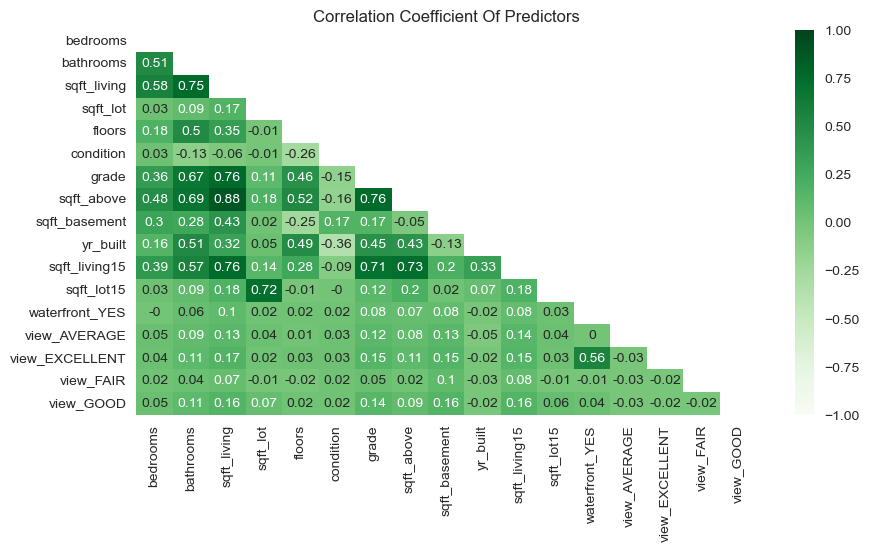

           feature          VIF
2      sqft_living          inf
7       sqft_above          inf
8    sqft_basement          inf
17           const  7991.177201
1        bathrooms     3.302484
6            grade     3.240348
10   sqft_living15     2.812048
11      sqft_lot15     2.123483
3         sqft_lot     2.094685
4           floors     1.934228
9         yr_built     1.816720
0         bedrooms     1.641691
14  view_EXCELLENT     1.546534
12  waterfront_YES     1.478656
5        condition     1.187949
16       view_GOOD     1.079328
13    view_AVERAGE     1.063058
15       view_FAIR     1.025156


In [322]:
# Define function to plot the correlation matrix
def corrmatrix(df):
    ''' This function plots a correlation matrix for a given dataframe '''
    plt.figure(figsize=(10, 5))

    corr = df.corr()

    # Generate a mask to only show the bottom triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # generate heatmap
    sns.heatmap(round(corr,2), annot=True, mask=mask, vmin=-1, vmax=1, cmap='Greens')
    plt.title('Correlation Coefficient Of Predictors')
    plt.show()
    
# Define function to print the VIF values of the predictors
def vif_df(df):
    ''' This function prints the VIF values of the predictors in a given dataframe '''
    vif_data = pd.DataFrame()
    
    # Add a constant to the dataframe
    X = df.assign(const=1)

    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    print(vif_data.sort_values(by='VIF', ascending=False))


# Plot the correlation matrix
corrmatrix(X_iter)

# Print the VIF values of the predictors
vif_df(X_iter)

We can see a very high VIF value for the `sqft_living`, `sqft_above`, and `sqft_basement` columns. Therefore, we will be dropping `sqft_living` from our model.

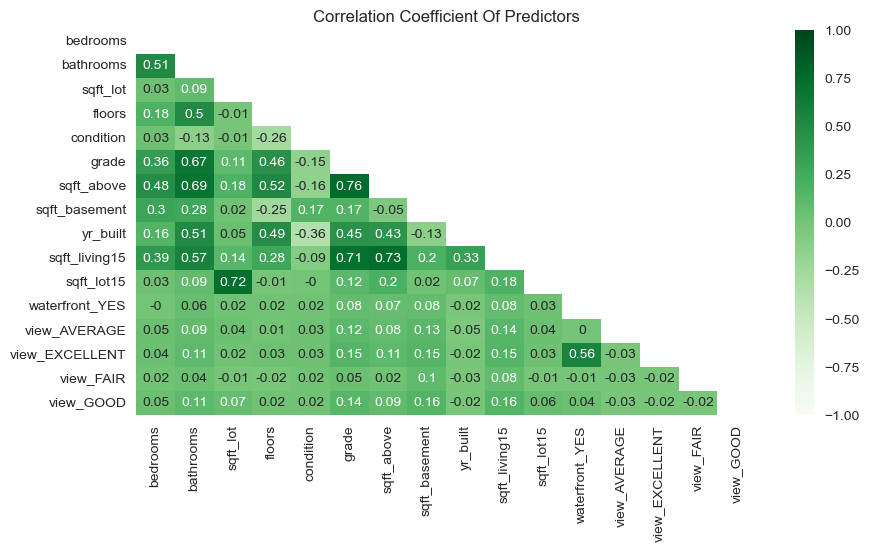

           feature          VIF
16           const  7991.177201
6       sqft_above     4.834813
1        bathrooms     3.302484
5            grade     3.240348
9    sqft_living15     2.812048
10      sqft_lot15     2.123483
2         sqft_lot     2.094685
7    sqft_basement     1.981861
3           floors     1.934228
8         yr_built     1.816720
0         bedrooms     1.641691
13  view_EXCELLENT     1.546534
11  waterfront_YES     1.478656
4        condition     1.187949
15       view_GOOD     1.079328
12    view_AVERAGE     1.063058
14       view_FAIR     1.025156


In [323]:
# Drop the 'sqft_living' column
X_iter.drop(['sqft_living'], axis=1, inplace=True)

# Visualize the correlation matrix and the VIF dataframe
corrmatrix(X_iter)
vif_df(X_iter)

The correlation matrix shows that the `sqft_above` column still has a high correlation. Therefore, we will be dropping `sqft_above` from our model.

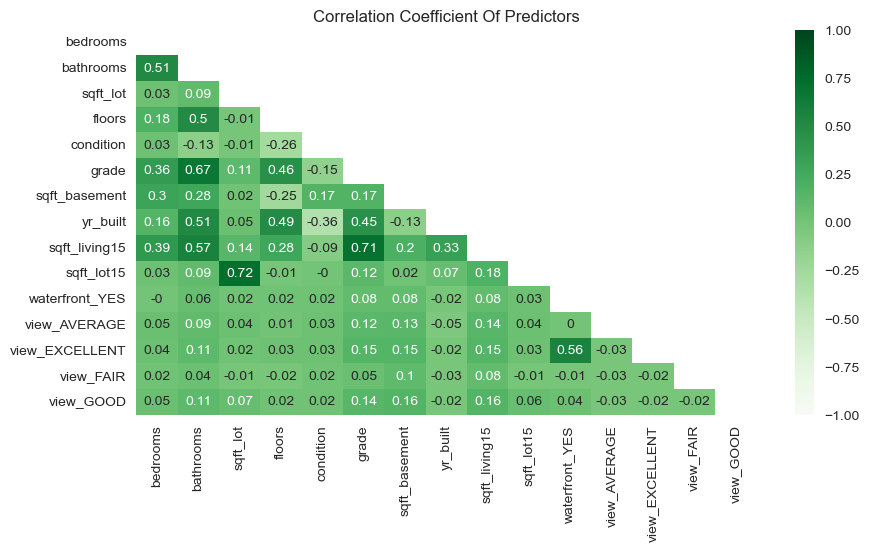

           feature          VIF
15           const  7956.618704
1        bathrooms     2.969652
5            grade     2.780924
8    sqft_living15     2.282297
9       sqft_lot15     2.114176
2         sqft_lot     2.082816
3           floors     1.896715
7         yr_built     1.790623
6    sqft_basement     1.578408
12  view_EXCELLENT     1.546500
10  waterfront_YES     1.477030
0         bedrooms     1.475156
4        condition     1.187719
14       view_GOOD     1.078949
11    view_AVERAGE     1.062833
13       view_FAIR     1.025087


In [324]:
# Drop the 'sqft_above' column
X_iter.drop(['sqft_above'], axis=1, inplace=True)

# Visualize the correlation matrix and the VIF dataframe
corrmatrix(X_iter)
vif_df(X_iter)

The correlation coefficients for the `bathrooms` column is still higher than our threshold. Therefore, we will be dropping the `bathrooms` column from our model.

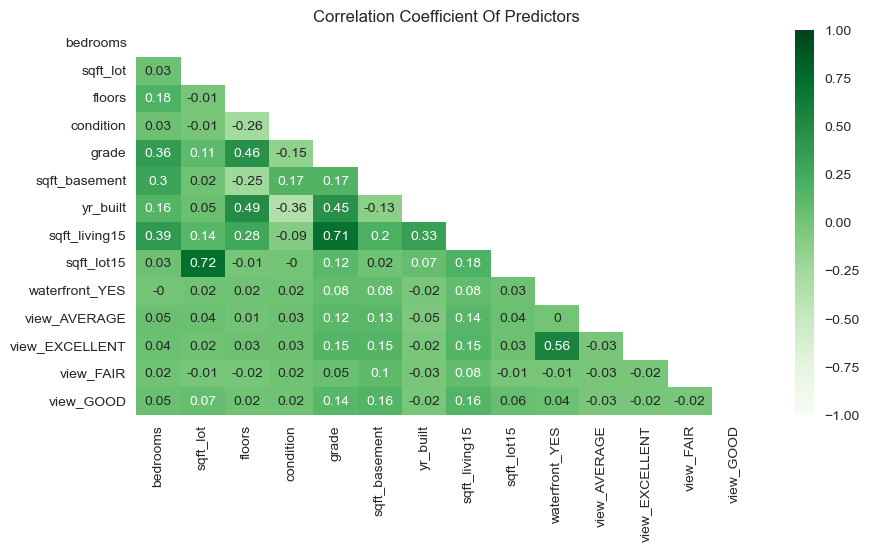

           feature          VIF
14           const  7066.323721
4            grade     2.621639
7    sqft_living15     2.249374
8       sqft_lot15     2.114127
1         sqft_lot     2.080635
2           floors     1.670595
6         yr_built     1.615203
11  view_EXCELLENT     1.546476
9   waterfront_YES     1.476606
5    sqft_basement     1.401570
0         bedrooms     1.323164
3        condition     1.185202
13       view_GOOD     1.078677
10    view_AVERAGE     1.062599
12       view_FAIR     1.025008


In [325]:
# Drop the 'bathrooms' column
X_iter.drop(['bathrooms'], axis=1, inplace=True)

# Visualize the correlation matrix and the VIF dataframe
corrmatrix(X_iter)
vif_df(X_iter)

Dropping the `bathrooms` column has further reduced the overall correlation in the dataset. However, the `sqft_living15` and `sqft_lot15` columns still have a high correlation. Therefore, we will be dropping them both from our model.

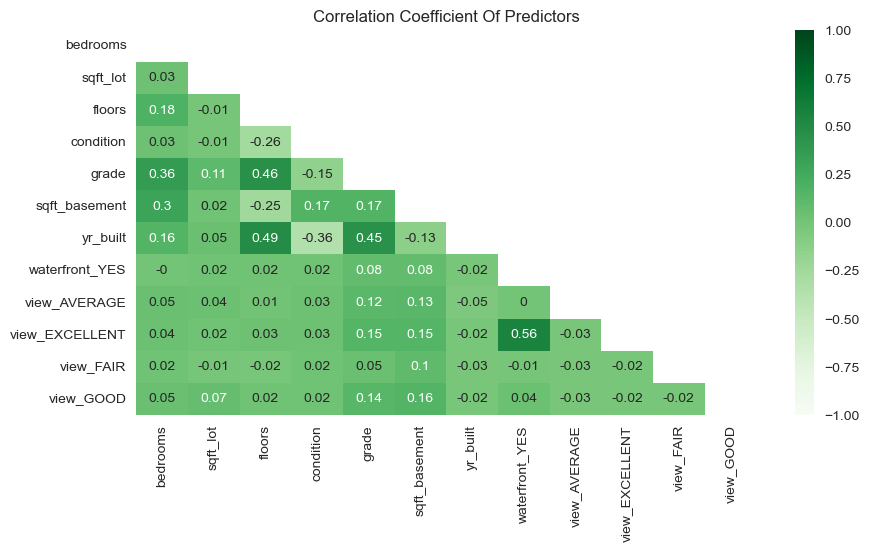

           feature          VIF
12           const  6995.603649
4            grade     1.753385
2           floors     1.658031
6         yr_built     1.606184
9   view_EXCELLENT     1.537416
7   waterfront_YES     1.476263
5    sqft_basement     1.400994
0         bedrooms     1.266129
3        condition     1.184633
11       view_GOOD     1.068646
8     view_AVERAGE     1.054079
1         sqft_lot     1.024057
10       view_FAIR     1.019902


In [326]:
# Drop the 'sqft_lot15' and 'sqft_living15' column
X_iter.drop(['sqft_lot15', 'sqft_living15'], axis=1, inplace=True)

# Visualize the correlation matrix and the VIF dataframe
corrmatrix(X_iter)
vif_df(X_iter)

Now that we have our VIF and correlation matrix, below the threshold, we can now build our multiple linear regression model.

##### 4.2.2.3 Build Model
> We will now build our multiple linear regression model.

In [327]:
# Create a model
iterated_model = sm.OLS(y, sm.add_constant(X_iter))
iterated_results = iterated_model.fit()

# Print the summary results of the baseline model
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     2647.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:55:37   Log-Likelihood:            -2.9033e+05
No. Observations:               21082   AIC:                         5.807e+05
Df Residuals:                   21069   BIC:                         5.808e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.137e+06   1.33e+05     38.

Now we can compare the baseline and iterated model statistics.

In [328]:
# Compare the baseline and iterated model mean absolute errors
iterated_mae = mean_absolute_error(y, iterated_results.predict(sm.add_constant(X_iter)))
print("Baseline Model Mean Absolute Error: ", baseline_mae)
print("Iterated Model Mean Absolute Error: ", iterated_mae)

# Compare the adjusted R-squared values of the baseline and model
print("Baseline Model Adjusted R-squared: ", baseline_results.rsquared_adj)
print("Iterated Model Adjusted R-squared: ", iterated_results.rsquared_adj)

Baseline Model Mean Absolute Error:  173713.2378046139
Iterated Model Mean Absolute Error:  147296.625677394
Baseline Model Adjusted R-squared:  0.49278505895823355
Iterated Model Adjusted R-squared:  0.6010210227347927


From the model results, we can see that the model is statistically significant as it explains 60% of the variance in the data compared to the 49% in the baseline model. Furthermore, the model is off by about \$147,297 compared to the \$173,713 in the baseline model. This is a significant improvement. 

We will now do an analysis of the coefficients of the model.

In [329]:
# Create a dataframe of the coefficients of the iterated model along with their p-values
results_df = pd.concat([round(iterated_results.params,3), round(iterated_results.pvalues,7)], axis=1)
results_df.columns = ["coefficient", "p-value"]
results_df

,coefficient,p-value
const,5137454.742,0.000000
bedrooms,16239.726,0.000000
sqft_lot,0.137,0.000498
floors,78262.473,0.000000
condition,19442.583,0.000000
grade,205091.669,0.000000
sqft_basement,118.865,0.000000
yr_built,-3277.171,0.000000
waterfront_YES,540924.431,0.000000
view_AVERAGE,69940.897,0.000000


##### 4.2.2.4 Model Results Analysis

We can see that all of the variables in the model are statistically significant.

- We can see that constant value is about \$5,137,455. This means that a house with no features would be worth about \$5,137,455.
  
- The coefficient of `bedrooms` is \$16,240 which means that for every bedroom increase in the house, the price of the house increases by about \$16,240.

- The coefficient of `ssqft_lot` is \$0.14 which means that for every square foot increase in the lot, the price of the house increases by about \$0.14.

- The coefficient of `floors` is \$78,262 which means that for every floor increase in the house, the price of the house increases by about \$78,262.

- The coefficient of `condition` is \$19,443 which means that for every condition rating increase in the house, the price of the house increases by about \$19,443.

- The coefficient of `grade` is \$205,092 which means that for every grade rating increase in the house, the price of the house increases by about \$205,092.

- The coefficient of `sqft_basement` is \$119 which means that for every square foot increase in the basement, the price of the house increases by about \$119.

- The coefficient of `yr_built` is -\$3,277 which means that for every year increase in the year the house was built, the price of the house decreases by about \$3,277.

- The coefficient of `waterfront_YES` is \$540,924 this means that if a house is on a waterfront, the price of the house increases by about \$540,924.

- The coefficients for `view` range from \$69,941 to \$340,899
  
  - `view_AVERAGE` is \$69,941 which means that for an average view compared to no view, the price of the house increases by about \$69,941.
  
  - `view_FAIR` is \$131,058 which means that for a fair view compared to no view, the price of the house increases by about \$131,058.
  
  - `view_GOOD` is \$137,050 which means that for a good view compared to no view, the price of the house increases by about \$137,050.
  
  - `view_EXCELLENT` is \$340,899 which means that for an excellent view compared to no view, the price of the house increases by about \$340,899.

- This `view` outcome is surprising since we would expect that the effect of having an average view to be better than having a fair view. However, the model shows that the effect of having a fair view is better than having an average view. This could perhaps suggest that the homes in the dataset with an average view are not as good as the homes with a fair view, or that that homes with an average value have been undervalued.

## 5. Conclusion
> In this phase we will be interpreting the model results and limitations in the context of the business problem and giving reccomendations to the stakeholder based on our modeling results.

### 5.1 Recommendations

Taking this analysis back to the original business problem, the aim was to help a real estate agency advise their clients on the best possible potential renovations to make to increase the the value. After modelling the data, we can see that the best renovations are as follows:

- Moving the house closer to the water. This will increase the value of the house by about \$540,924. As a result this most likely means that it make the view excellent as the two features are fairly correlated. In turn, by making the view excellent, the value of the house will increase by about \$340,899. However, this renovation can only be made if land is close water.

- The second best renovation to make is to improve the grade of the house. This will increase the value of the house by about \$205,092 for every grade.

- The third best renovation to make is to increase the number of floors in the house. This will increase the value of the house by about \$78,262 for every floor. However, it is worth mentioning that our data only had 3.5 floors as the maximum. Therefore, it is unlikely that this statistic would apply to a house with more than 3.5 floors.

- Increasing the number of bedrooms in the house will increase the value of the house by about \$16,240 for every bedroom. However, it is worth mentioning that our data only had 10 bedrooms as the maximum. Therefore, it is unlikely that this statistic would apply to a house with more than 10 bedrooms.

- Lastly, increasing the size of the basement will increase the value of the house by about \$119 for every square foot. However, it is worth mentioning that our data only had 4,820 square feet as the maximum. Therefore, it is unlikely that this statistic would apply to a house with more than 4,820 square feet.


### 5.2 Limitations

Though our model did show a significant increase in the accuracy of the model, there are still some limitations to the model. These limitations are as follows:

- The data in the dataset is from 2014 and 2015. Therefore, it may not be able to account for changes in the housing market since then. As a result the model may not be able to predict the value of a house in 2022. 

- In order to improve the value of a house, we would need to understand the market (i.e. what buyers are looking for). Therefore, by not having this information, we are unable to advise our clients on the best renovations to make. It is possible to build the most expensive house in the world, but if it is not what buyers are looking for, then it will not be sold. There is no value in that.

- By using a correlation threshold of 0.6, we may have ignored dropping some freatures with a high correlation. This may have led to multicollinearity in the model. As a result, the model may not be able to predict the value of a house accurately.